### Visuals & Graphs

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
df = pd.read_csv('../airline_safety/data/clean_aviation_data.csv')

In [156]:
df.head()

,event_type,event_date,tail_number,highest_injury_level,fatal_injury_count,serious_injury_count,minor_injury_count,probable_cause,latitude,longitude,airport_id,operator,make,aircraft_damage,model
0,INC,2023-11-30,N494HA,minor,0,0,1,unknown,20.899501,-156.429730,OGG,hawaiian,boeing,Minor,717
1,ACC,2023-09-30,N37560,none,0,0,0,unknown,39.849312,-104.673820,DEN,united,boeing,Substantial,737
2,ACC,2023-08-21,N516AS,none,0,0,0,unknown,33.675701,-117.867990,SNA,alaska,boeing,Substantial,737
3,INC,2023-08-11,"N7734H, N564HV",none,0,0,0,unknown,32.730189,-117.175620,SAN,southwest,boeing,no_damage,737
4,INC,2023-08-03,N649JB,none,0,0,0,unknown,30.486167,-81.750781,JAX,jetblue,airbus,no_damage,A320


In [157]:
df.groupby(df['airport_id']).describe()

fatal_injury_count                                     \
                        count mean  std  min  25%  50%  75%  max   
airport_id                                                         
ABQ                       3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
ACY                       1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0   
AJN                       1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0   
AMS                       1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0   
ANC                       2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                       ...  ...  ...  ...  ...  ...  ...  ...   
WWR                       1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0   
YGF                       1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0   
YNG                       1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0   
YNN                       1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0   
YYC                       1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0   

           serious_injury_count       ...   latitude            longitude  \
                          count mean  ...        75%        max     count   
airport_id                            ...                                   
ABQ                         3.0  0.0  ...  35.026666  35.033332       3.0   
ACY                         1.0  0.0  ...  39.358791  39.358791       1.0   
AJN                         1.0  0.0  ...  58.579456  58.579456       1.0   
AMS                         1.0  0.0  ...  52.308762  52.308762       1.0   
ANC                         2.0  0.0  ...  59.860975  61.174446       2.0   
...                         ...  ...  ...        ...        ...       ...   
WWR                         1.0  1.0  ...  36.700466  36.700466       1.0   
YGF                         1.0  0.0  ...  26.548100  26.548100       1.0   
YNG                         1.0  0.0  ...  41.249683  41.249683       1.0   
YNN                         1.0  0.0  ...   0.000000   0.000000       1.0   
YYC                         1.0  0.0  ...   0.000000   0.000000       1.0   

                                                                       \
                  mean        std         min         25%         50%   
airport_id                                                              
ABQ         -71.033333  61.516691 -106.599998 -106.549999 -106.500000   
ACY         -74.458599        NaN  -74.458599  -74.458599  -74.458599   
AJN        -134.770935        NaN -134.770935 -134.770935 -134.770935   
AMS           4.772700        NaN    4.772700    4.772700    4.772700   
ANC        -154.743133   6.712918 -159.489883 -157.116508 -154.743133   
...                ...        ...         ...         ...         ...   
WWR         -99.889244        NaN  -99.889244  -99.889244  -99.889244   
YGF         -78.696300        NaN  -78.696300  -78.696300  -78.696300   
YNG         -80.670310        NaN  -80.670310  -80.670310  -80.670310   
YNN           0.000000        NaN    0.000000    0.000000    0.000000   
YYC           0.000000        NaN    0.000000    0.000000    0.000000   

                                    
                   75%         max  
airport_id                          
ABQ         -53.250000    0.000000  
ACY         -74.458599  -74.458599  
AJN        -134.770935 -134.770935  
AMS           4.772700    4.772700  
ANC        -152.369758 -149.996383  
...                ...         ...  
WWR         -99.889244  -99.889244  
YGF         -78.696300  -78.696300  
YNG         -80.670310  -80.670310  
YNN           0.000000    0.000000  
YYC           0.000000    0.000000  

[147 rows x 40 columns]

---

### Fatalities by Aircraft Maker

In [162]:
models = pd.DataFrame(df.groupby('make')['fatal_injury_count'].sum().reset_index())

In [166]:
models = models[models['fatal_injury_count'] > 0]

In [168]:
models = models.sort_values(by = 'fatal_injury_count', ascending = False)

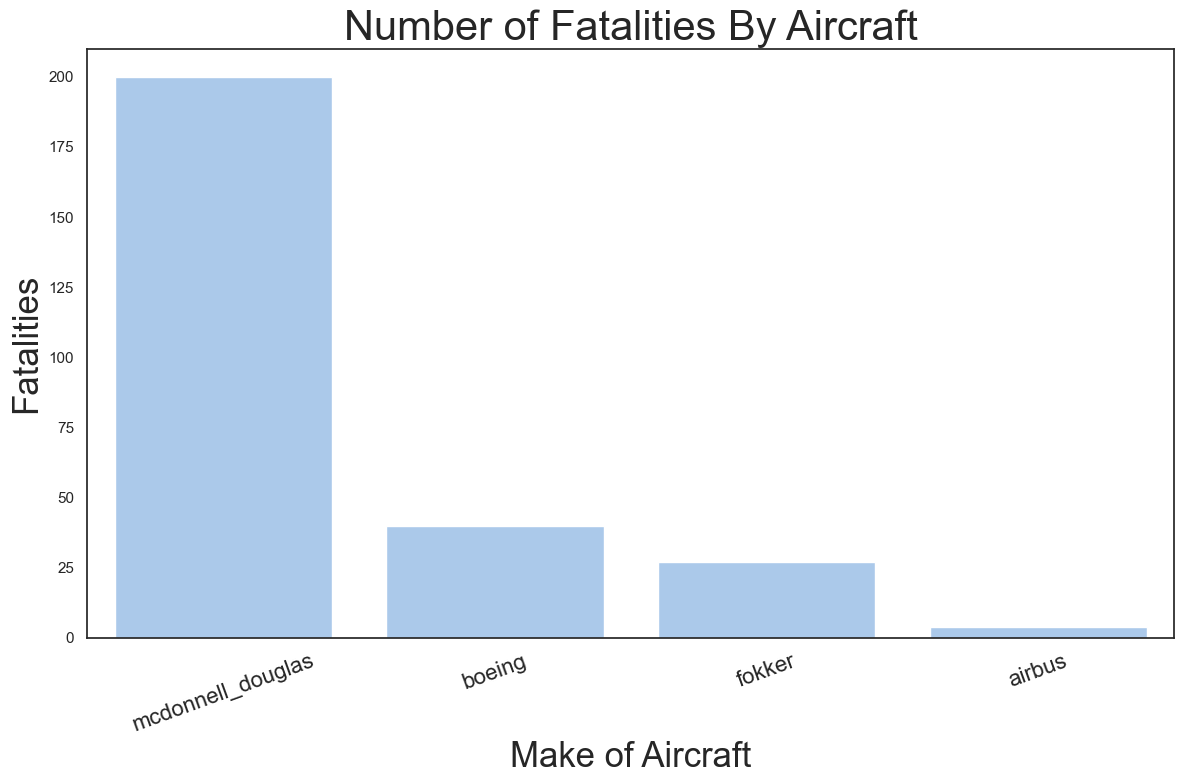

In [231]:
# plot
plt.figure(figsize = (12, 8))
sns.set_theme(style='white', palette=None)
plt.tight_layout()

sns.set_color_codes("pastel")
sns.barplot(data = models,
            x = 'make',
            y = 'fatal_injury_count',
           color = 'b')

# Plot Labels
plt.title('Number of Fatalities By Aircraft', size = 30)

plt.xlabel('Make of Aircraft', size = 25)
plt.xticks(size = 16, rotation = 20)
plt.ylabel('Fatalities', size = 25);

#plt.tight_layout()
#plt.savefig('../airline_safety/images/num_fatal_aircraft.png')



In [174]:
models.sort_values('make')

,make,fatal_injury_count
1,airbus,4
3,boeing,40
10,fokker,27
12,mcdonnell_douglas,200


---

### Model of aircraft Visuals

In [228]:
df['model'].unique()

array(['717', '737', 'A320', '767', 'A321', 'MD-88', '777', '757',
       'MD-11', '747', 'A319', 'A330', 'ERJ-145', 'DASH-8', 'MD-90',
       'DC-8', 'ERJ-190', '787', 'A300', 'CL-600-2C10', 'F4-622R',
       'ATR72', 'CL600-2C10', 'MD-82', 'EMB-135', 'ERJ-140', 'MD-83',
       'SAAB-340', '727', 'ATR72-212', 'DC-10', 'MD-80', 'EMB-120ER',
       'ATR-42-2000', 'ATR-42-300', 'SA227-AC', 'DC-9', 'BAE-146',
       'RJ-70', 'FOKKER-100', 'ATP', 'L-1011', 'F28-4000', 'A310',
       'SD3-60', 'BAC-111', 'CL44D4', '707', '1-11/204/AF'], dtype=object)

---

### Injury Level by Airline

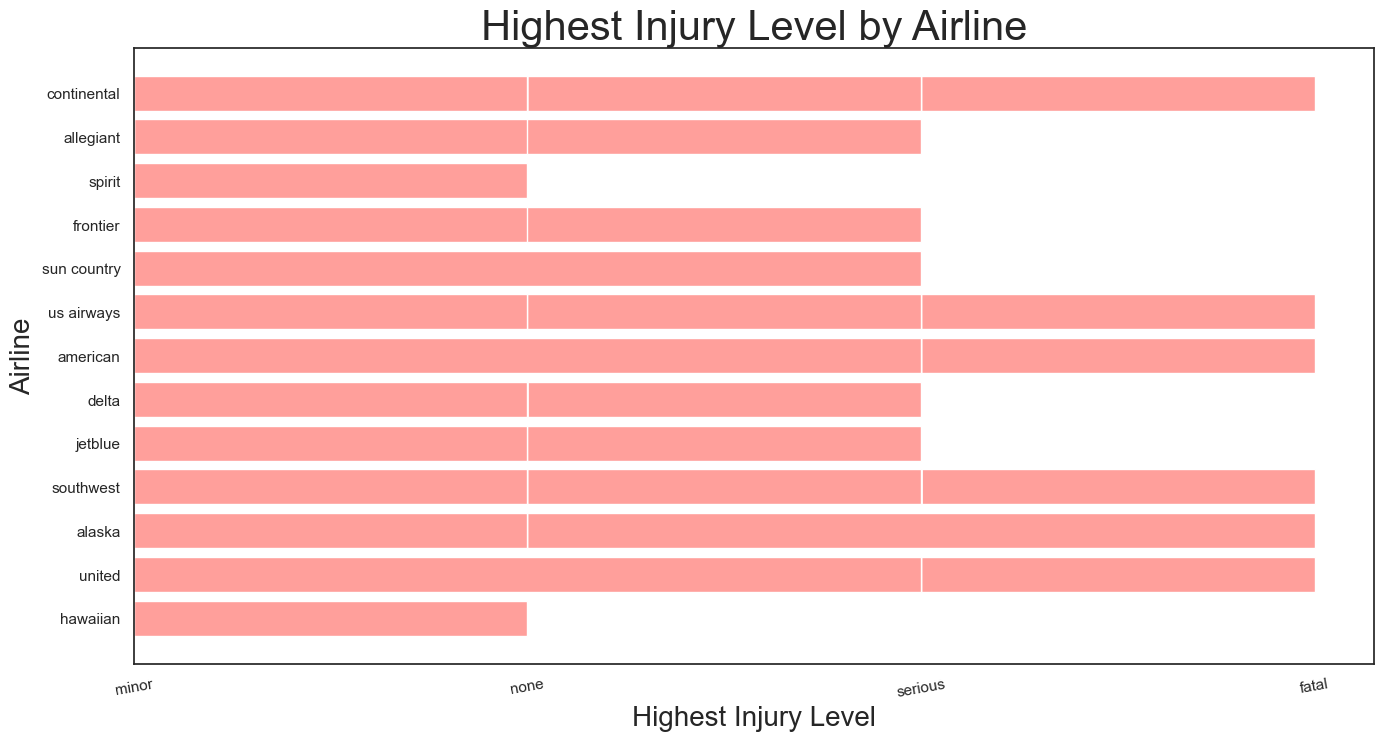

In [235]:
#using Kristina's better chart!
plt.figure(figsize = (16, 8))

# Bar Chart
plt.barh(df['operator'],
       df['highest_injury_level'],
        color='r')

# Create a descriptive title
plt.title('Highest Injury Level by Airline',
         size = 30)

# rotate our x-ticks
plt.xticks(rotation = 10) #rotation is how many degrees to rotate tick mark

# label our axes
plt.xlabel('Highest Injury Level', size = 20)
plt.ylabel('Airline', size = 20);

---

### Airport ID Visuals